## Objective function

To train a deep-learning model, you need to use optimization via gradient descent. And like any optimization problem, you need to have an *objective function*. The goal is to minimize or maximize that function. In deep neural networks, the objective function is the very loss function that was discussed in the previous lesson. Hence, training a deep neural network means minimizing its loss function with respect to its parameters.

In other words, training a neural network involves minimizing the loss function by playing with the weights and the biases of the model. Optimization is a very broad area, but you won't explore it in detail here. Instead, jump into the gradient descent algorithm.

## Gradient descent

Gradient descent is an iterative method of solving optimization problems. In this case, you need to minimize the loss function with respect to the parameters of the network—that is, the weights and the biases in all of the layers.

Before learning about the algorithm itself, first you need to understand what the *gradient* is. In mathematics, the gradient is defined as the first derivative of function with respect to a variable. If you denote the loss function as $L(x)$, where $x$ is a parameter to be optimized, then the gradient of $L$ with respect to $x$ is denoted by $L'(x)$. It's the very first order derivative of $L$ with respect to $x$.

More generally, you can consider $W$ as a vector, such that each element represents a parameter of the network: $\boldsymbol{W} = [w_1, w_2, \ldots, w_d]^\top$.

Then, the gradient of the loss function $L(\boldsymbol{W})$ with respect to $\boldsymbol{W}$ is a vector consisting of $d$ partial derivatives:

$$\nabla_{\boldsymbol{W}} L(\boldsymbol{W}) = \bigg[\frac{\partial L(\boldsymbol{W})}{\partial w_1}, \frac{\partial L(\boldsymbol{W})}{\partial w_2}, \ldots, \frac{\partial L(\boldsymbol{W})}{\partial w_d}\bigg]^\top$$


### The gradient descent algorithm

The gradient descent algorithm belongs to the family of iterative algorithms. It starts with initial values (often random assignments or `0`) for the parameters to be optimized. Then, in each iteration, it updates the values of the parameters according to a rule. Here is the gradient descent algorithm:

1. Initialize the parameters with some values:

$$W=W_0$$

That is:
$$w_1 = w_{1,0},$$
$$w_2 = w_{2,0},$$
$$\vdots$$
$$w_d = w_{d,0}$$

2. At every step `t`, update each parameter according to the following rule:

$$W_{t+1} \leftarrow W_{t} - \eta L'(W_{t})$$

That is:
$$w_{1,t+1} = w_{1,t} - \eta L'(w_{1,t}),$$
$$w_{2,t+1} = w_{2,t} - \eta L'(w_{2,t}),$$
$$\vdots$$
$$w_{d,t+1} = w_{d,t} - \eta L'(w_{d,t})$$

3. The iteration stops if $L(W_{t+1}) - L(W_{t}) < \epsilon$ or $t=T$. That is, it stops if the differences between the consecutive values of the objective (loss) function are below a threshold or if the iteration number reaches a preset threshold `T`.



### The learning rate

Note that in the gradient descent algorithm, the *learning rate parameter* $\eta$ is something that is determined outside of the model. That is to say, the learning rate is a hyperparameter of the model to be tuned. Setting the learning rate to a value that's too high or too low may have serious consequences. But if you set the learning rate to a good value, two things should happen:

- The training should converge—that is, it should reach a value so close to the local or global minimum that there is usually no significant error decrease or performance increase anymore.
- The convergence speed should be reasonable.

The figure below illustrates this:

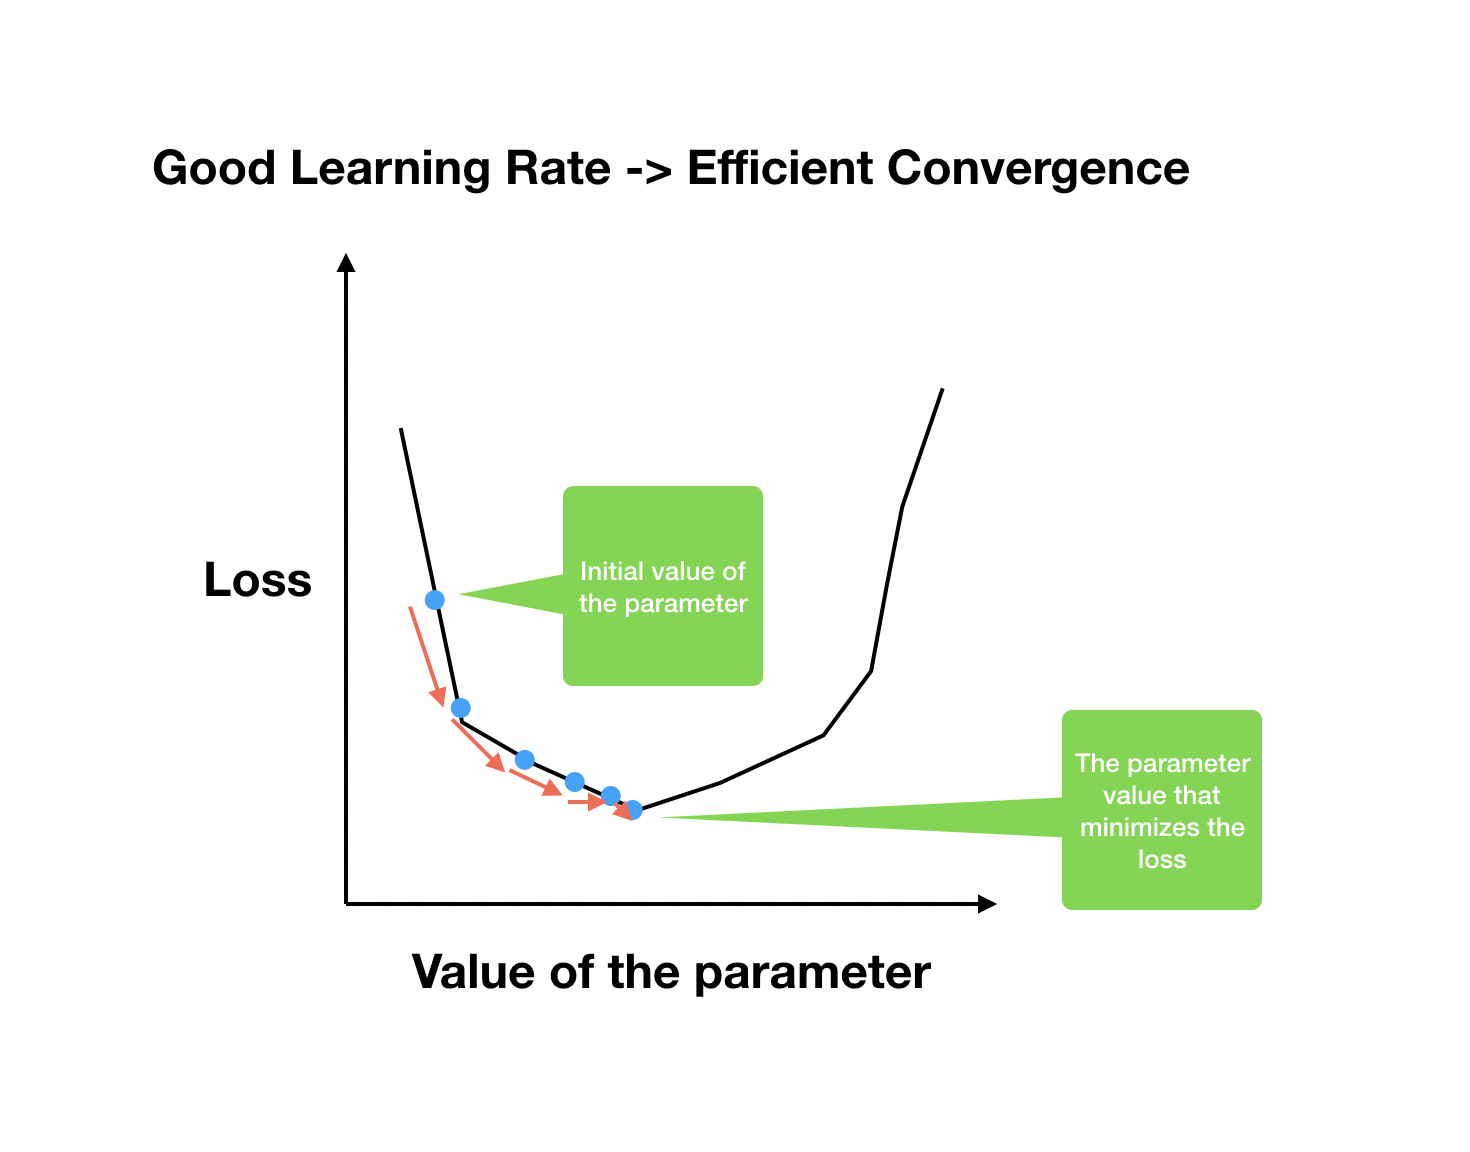

On the other hand, if you set the learning rate too high, you risk divergence. That means that the training process will never converge. The figure below shows this:

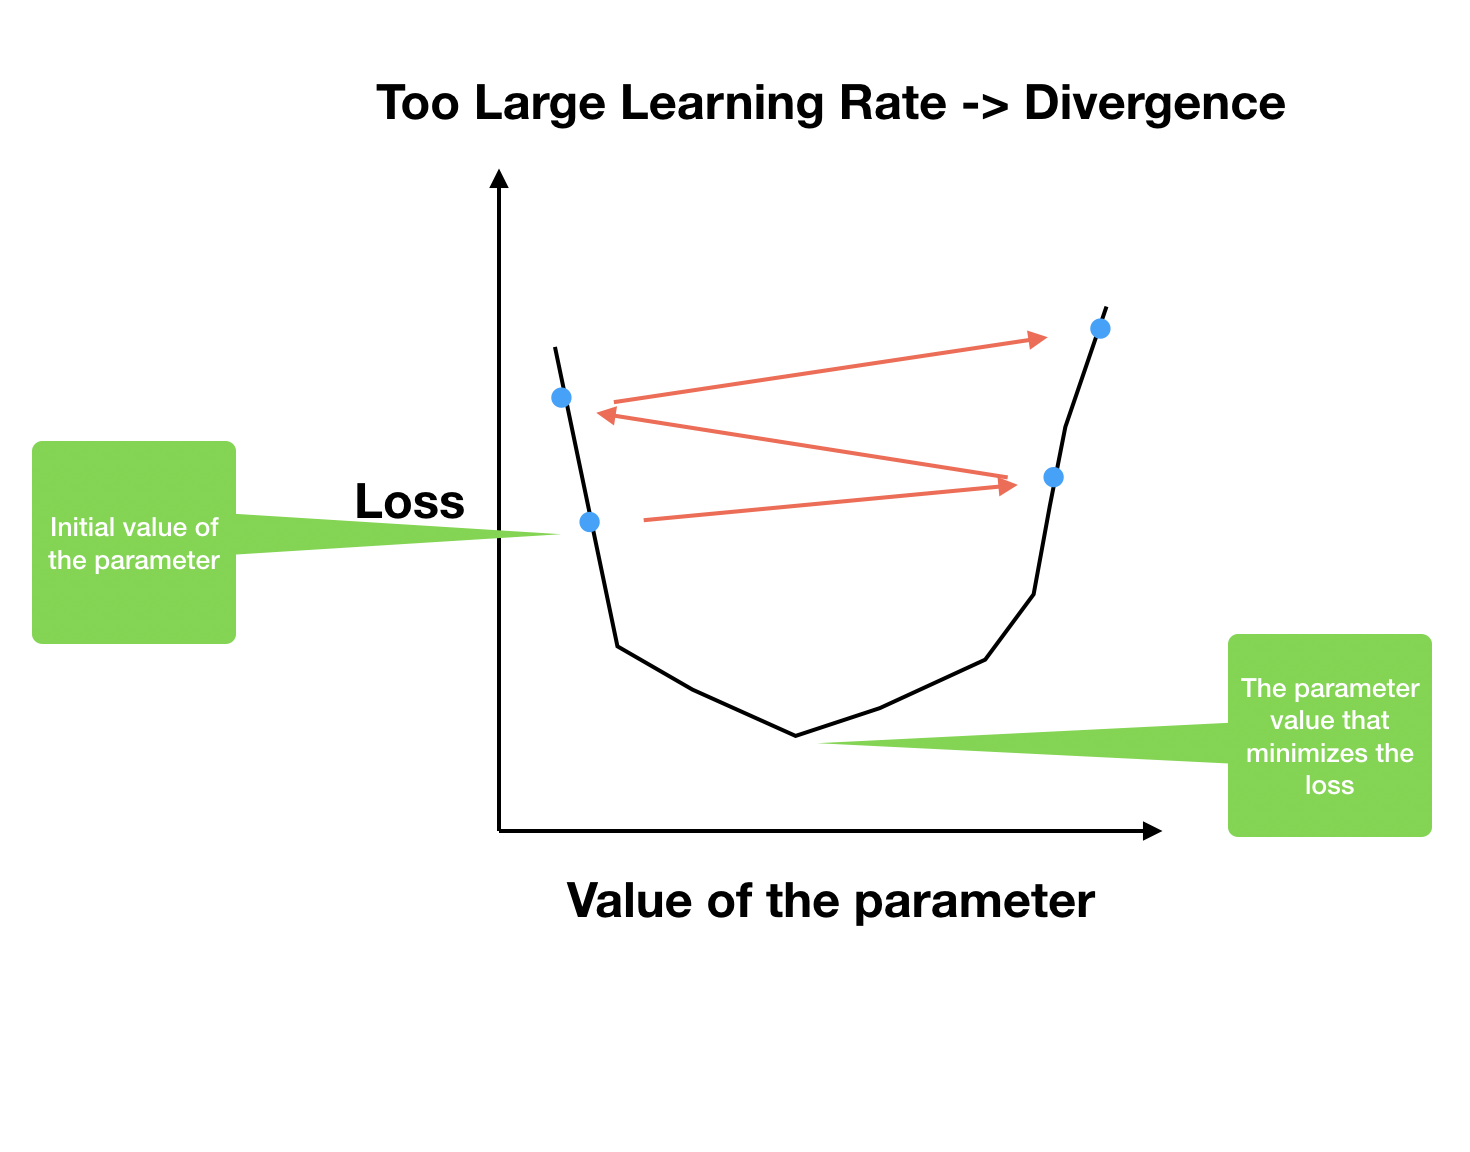

And if you set the learning rate too low, the training process should converge very slowly, as shown below:

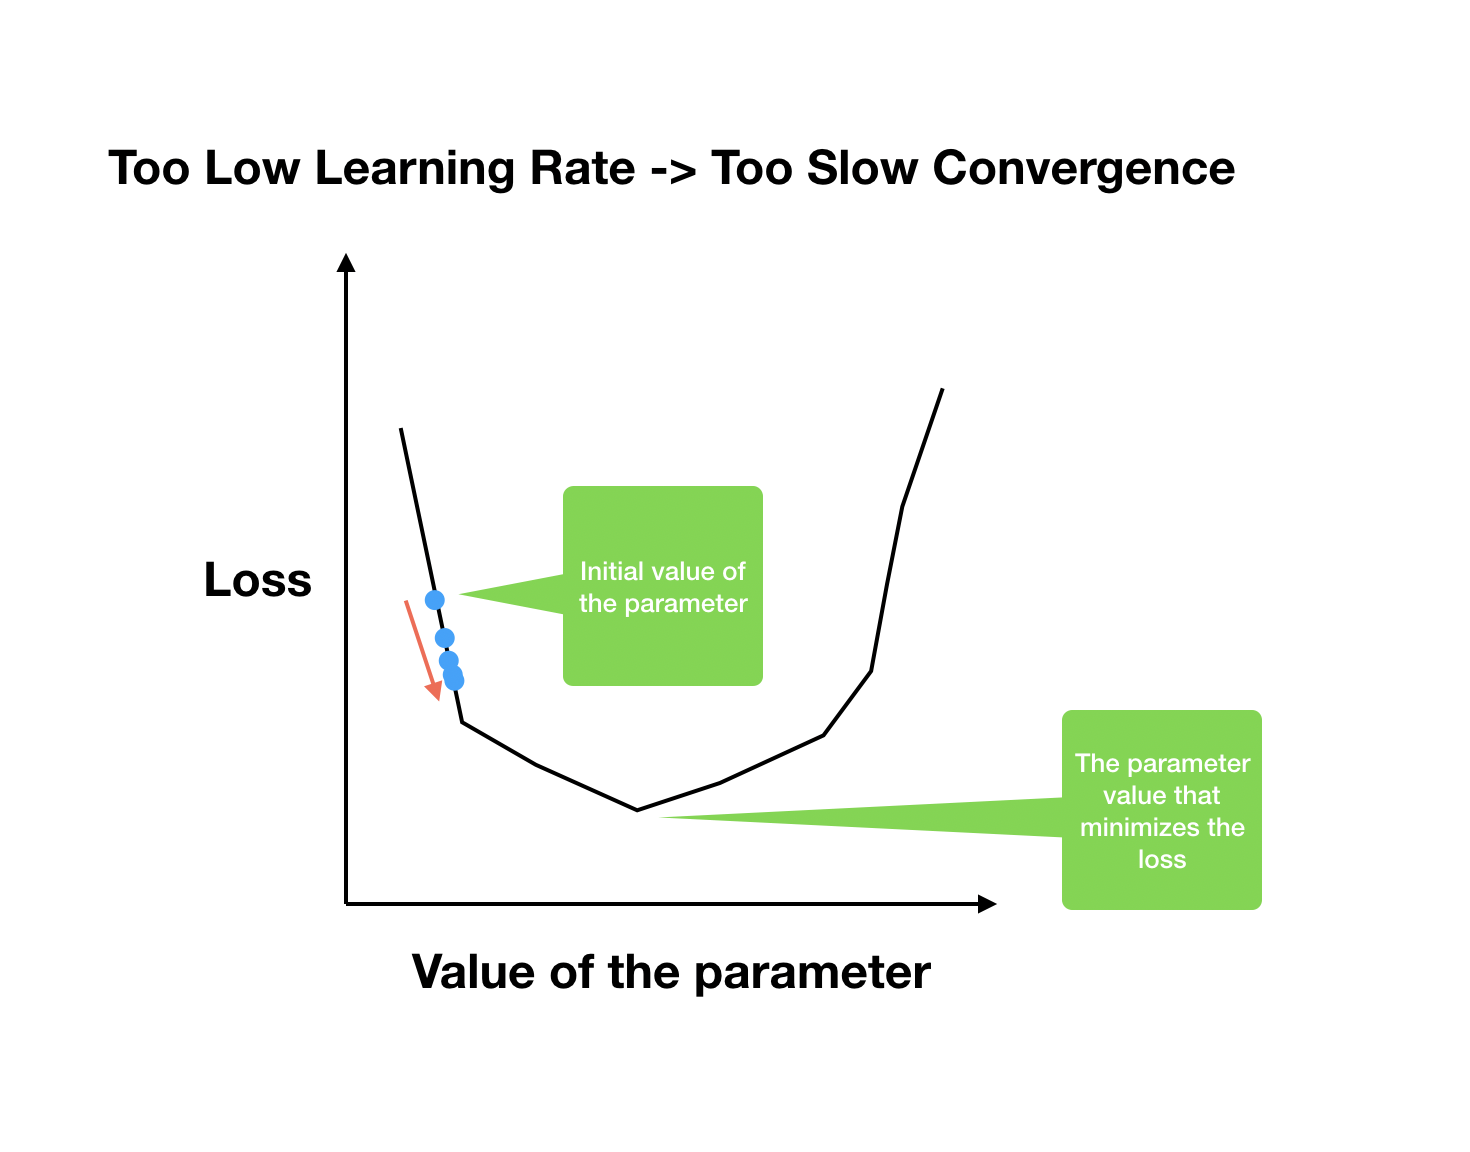

As a result, you need to be careful about setting the learning rate to a reasonable value. If you aren't sure what value to set for the learning rate, the default values in Keras may be a good starting point for many tasks.

### Variants of the gradient descent algorithm

So far, you've learned about a general form of the gradient descent algorithm. However, this algorithm has many variants. Next, you'll look at a few of them.

#### Stochastic gradient descent

In deep learning, the objective function is usually the average of the loss functions for each example in the training dataset. Assume that $L_i(\boldsymbol{W})$ is the loss function of the training data with $n$ examples. Here, $\boldsymbol{W}$ denotes the parameter vector. Then you have the objective function:

$$L(\boldsymbol{W}) = \frac{1}{n} \sum_{i = 1}^n L_i(\boldsymbol{W})$$

The gradient of the objective function at $\boldsymbol{W}$ is computed as follows:

$$\nabla L(\boldsymbol{W}) = \frac{1}{n} \sum_{i = 1}^n \nabla L_i(\boldsymbol{W})$$

If gradient descent is used, the computing cost for each independent variable iteration is $\mathcal{O}(n)$, which grows linearly with $n$. Therefore, when the model training data instance is large, the cost of gradient descent for each iteration will be very high.

Stochastic gradient descent reduces computational cost at each iteration. At each iteration of stochastic gradient descent, you uniformly sample an index $i\in\{1,\ldots,n\}$ for data instances at random. Then you compute the gradient $\nabla f_i(\boldsymbol{W})$ to update $\boldsymbol{W}$:

$$\boldsymbol{W} \leftarrow \boldsymbol{W} - \eta \nabla f_i(\boldsymbol{W})$$

Here, $\eta$ is the learning rate. You can see that the computing cost for each iteration drops from $\mathcal{O}(n)$ of the gradient descent to the constant $\mathcal{O}(1)$.

#### Mini-batch stochastic gradient descent

In each iteration, the gradient descent algorithm uses the entire training dataset to compute the gradient. Because of this, it's sometimes referred to as *batch gradient descent*. Stochastic gradient descent randomly selects only one example in each iteration to compute the gradient. As in previous lessons, you can perform random uniform sampling for each iteration to form a mini-batch, and then you can use this mini-batch to compute the gradient.

As you may recall, this is what you did when you trained ANN models in the previous lessons. When you're training your models using Keras, you set the size of the mini-batch as follows:

```python
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)
```

In the code above, the `batch_size` parameter refers to the mini-batch size of the gradient descent.

## Backpropagation

Now you've learned how to train neural networks. However, one problem still needs to be answered. A deep neural network has many layers. How can you take the derivative of the loss function with respect to the weights of, say, the first layer? Or, more formally, how can you compute the gradient of the loss function with respect to the previous layers' weights?

The method used in computing the gradients in a deep neural network is called *backpropagation*. Consider the following figure. It depicts a simple neural network with two hidden layers.

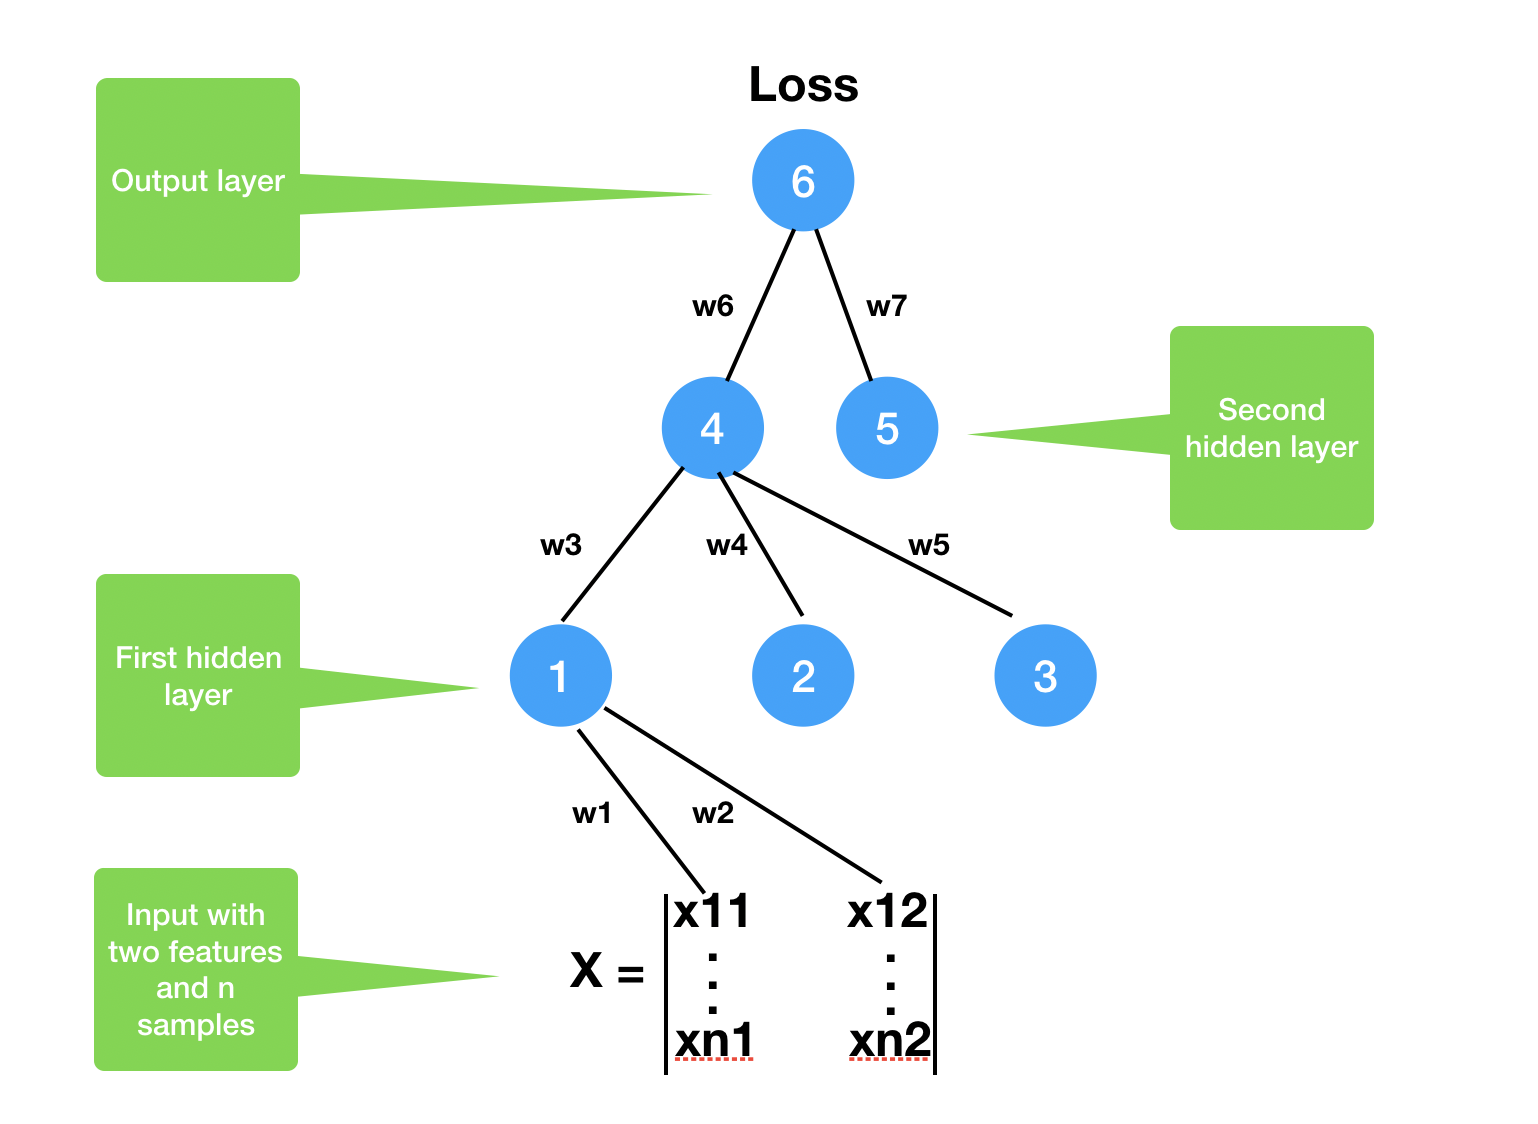

In the figure above, the loss function is a direct function of the weights $w_6$ and $w_7$. Hence, calculating the gradients of the loss with respect to $w_6$ and $w_7$ is simple. You just take the first derivative of the loss with respect to $w_6$ and $w_7$:

$$\frac{\partial L(\boldsymbol{W})}{\partial w_6}, \frac{\partial L(\boldsymbol{W})}{\partial w_7}$$

But how do you calculate the gradient of the loss function with respect to $w_3$, $w_4$, and $w_5$? The answer is that you can apply the chain rule, because $w_6$ is a function of $w_3$, $w_4$, and $w_5$:

$$\frac{\partial L(\boldsymbol{W})}{\partial w_5} = \frac{\partial L(\boldsymbol{W})}{\partial w_6} \frac{\partial w6}{\partial w_5}$$

$$\frac{\partial L(\boldsymbol{W})}{\partial w_4} = \frac{\partial L(\boldsymbol{W})}{\partial w_6} \frac{\partial w6}{\partial w_4}$$

$$\frac{\partial L(\boldsymbol{W})}{\partial w_3} = \frac{\partial L(\boldsymbol{W})}{\partial w_6} \frac{\partial w6}{\partial w_3}$$

Similarly, you can calculate the gradients of the loss function with respect to the $w_1$ and $w_2$ by using the chain rule, as follows:

$$\frac{\partial L(\boldsymbol{W})}{\partial w_2} = \frac{\partial L(\boldsymbol{W})}{\partial w_6} \frac{\partial w6}{\partial w_3} \frac{\partial w3}{\partial w_2}$$

$$\frac{\partial L(\boldsymbol{W})}{\partial w_1} = \frac{\partial L(\boldsymbol{W})}{\partial w_6} \frac{\partial w6}{\partial w_3} \frac{\partial w3}{\partial w_1}$$